In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
import pandas as pd
from io import StringIO
import warnings
# Disable the specific warning by filtering it to "ignore"
warnings.filterwarnings('ignore')

path = "./oldData"
# Load MFCC data and labels
X_train = np.load(path+'/mfcc/MFCC_data.npy')
y_train = np.load(path+'/mfcc/language_dummy.npy')
X_test = np.load(path+'/mfcc/MFCC_data_t.npy')
y_test = np.load(path+'/mfcc/language_dummy_t.npy')

# Define the number of classes (replace with the actual number)
num_classes = 3  # Change this to the number of classes in your dataset

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers

InputDim = (X_train.shape[1], X_train.shape[2], 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(InputDim)))
model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

In [3]:
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, callbacks

# Compile the model
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks

reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1, mode="auto", min_delta=0.000001, cooldown=0, min_lr=1e-10,)
early_stop = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10, verbose=1, mode="auto", baseline=None, restore_best_weights=True,)

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_data=(X_val, y_val), callbacks=[reduce_lr, early_stop])
# Train the model with callbacks
# history = model.fit(X_train, y_train, epochs=100, batch_size=64,
#                     validation_data=(X_val, y_val))


Epoch 1/50
183/183 [==============================] - 26s 90ms/step - loss: 1.1203 - accuracy: 0.3366 - val_loss: 1.0982 - val_accuracy: 0.3475 - lr: 0.0100
Epoch 2/50
183/183 [==============================] - 14s 79ms/step - loss: 1.0967 - accuracy: 0.3589 - val_loss: 1.0955 - val_accuracy: 0.3789 - lr: 0.0100
Epoch 3/50
183/183 [==============================] - 15s 79ms/step - loss: 1.0861 - accuracy: 0.3969 - val_loss: 1.0943 - val_accuracy: 0.3516 - lr: 0.0100
Epoch 4/50
183/183 [==============================] - 15s 80ms/step - loss: 1.0652 - accuracy: 0.4314 - val_loss: 1.0766 - val_accuracy: 0.4104 - lr: 0.0100
Epoch 5/50
183/183 [==============================] - 15s 80ms/step - loss: 1.0335 - accuracy: 0.4653 - val_loss: 1.0596 - val_accuracy: 0.4391 - lr: 0.0100
Epoch 6/50
183/183 [==============================] - 16s 85ms/step - loss: 0.9826 - accuracy: 0.5299 - val_loss: 1.0459 - val_accuracy: 0.4637 - lr: 0.0100
Epoch 7/50
183/183 [==============================] - 16s 

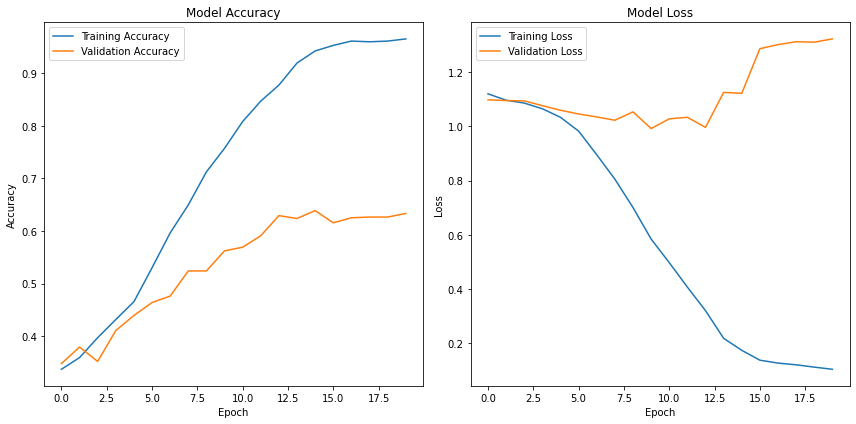

17/17 - 2s - loss: 1.4647 - accuracy: 0.3426 - 2s/epoch - 116ms/step
Test Accuracy: 34.26%
17/17 [==============================] - 1s 32ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.15      0.22       180
           1       0.33      0.34      0.33       180
           2       0.34      0.54      0.42       180

    accuracy                           0.34       540
   macro avg       0.36      0.34      0.32       540
weighted avg       0.36      0.34      0.32       540



In [4]:
# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Predict classes for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and true labels back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate a classification report
from sklearn.metrics import classification_report
classification_rep = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", classification_rep)

17/17 - 1s - loss: 1.4647 - accuracy: 0.3426 - 570ms/epoch - 34ms/step
Test Accuracy: 34.26%
17/17 [==============================] - 1s 31ms/step
Saved classification report to ./exp/CNN_2\report_classification.csv
Saved confusion matrix to ./exp/CNN_2\confusion_matrix.csv


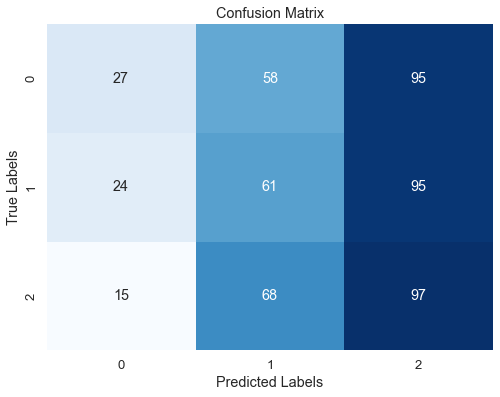

Saved training plots to ./exp/CNN_2\training_plots.png


In [5]:
def report_to_list(rep):
    if type(rep) == str:
        lines = rep.split('\n')
        values = [line.split()[0:] for line in lines[0:]]
        values = [item for item in values if item]
        values = [item for item in values if item]

        for i in range(0,len(values)):
            if(i==0):
                values[i].insert(0, '')
            elif(i>len(values)-2-1):
                values[i][0] = ' '.join(values[i][0:2])
                del values[i][1]
            elif(i>len(values)-3-1):
                values[i].insert(1, '')
                values[i].insert(1, '')

            else:
                values[i][0] = i-1

        return values
    else:
        print("report must be str")
        return rep

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Predict classes for the test set
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions and true labels back to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


# Generate the classification report
classification_rep = classification_report(y_true_classes, y_pred_classes, digits=5)

classification_df = report_to_list(classification_rep)
Column = classification_df[0]
Column[0] = "Model Reports"
results = pd.DataFrame(columns = classification_df[0])
i=0
for row in classification_df:
    i=i+1
    if(i==1):
        next
    results = results.append(pd.DataFrame([row], columns=Column), ignore_index=True)

results = results.append(pd.DataFrame([[" ", " ", " ", " ", " "]], columns=Column), ignore_index=True)


# Determine the next available experiment number
exp_number = 1
while os.path.exists(f"./exp/CNN_{exp_number}"):
    exp_number += 1

# Create a directory for the experiment
exp_directory = f"./exp/CNN_{exp_number}"
os.makedirs(exp_directory)

# Save the classification report to a CSV file within the experiment directory
report_filename = os.path.join(exp_directory, "report_classification.csv")
results.to_csv(report_filename, index=False)
print(f"Saved classification report to {report_filename}")

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Save the confusion matrix to a CSV file within the experiment directory
confusion_matrix_filename = os.path.join(exp_directory, "confusion_matrix.csv")
pd.DataFrame(confusion_mat).to_csv(confusion_matrix_filename, index=False)
print(f"Saved confusion matrix to {confusion_matrix_filename}")



# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(exp_directory, "confusion_matrix.png"))
plt.show()




# Plot the training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

# Save the training and validation plots as PNG files
plots_directory = exp_directory  # Change this to your desired directory
os.makedirs(plots_directory, exist_ok=True)  # Create the directory if it doesn't exist
plots_filename = os.path.join(plots_directory, 'training_plots.png')
plt.savefig(plots_filename)
print(f"Saved training plots to {plots_filename}")
plt.close()